Importing the dependancies

In [200]:
import numpy as np
import pandas as pd
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [201]:
#loading the Malware dataset to a pandas DataFrame
ransomware_dataset = pd.read_csv('/content/Obfuscated-MalMem2022.csv')

In [202]:
#printing the first 5 rows of dataset
ransomware_dataset.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,39,12,12.286790,0,280.333333,1932,49.538462,10933,280.333333,...,222,26,27,118,0,124,88,0,8,Benign
1,Benign,40,12,12.863824,0,293.275000,1985,49.625000,11731,293.275000,...,222,26,27,118,0,123,88,0,8,Benign
2,Benign,40,12,13.494257,0,305.525000,2088,52.200000,12221,305.525000,...,222,26,27,118,0,123,88,0,8,Benign
3,Benign,40,12,13.692129,0,309.313418,2089,52.234258,12372,309.313418,...,222,26,27,118,0,123,88,0,8,Benign
4,Benign,44,13,12.592063,0,279.873904,2196,49.909091,12314,279.873904,...,222,26,27,118,0,122,88,0,8,Benign


In [203]:
# number of rows and columns in this dataset
ransomware_dataset.shape


(19090, 57)

In [204]:
# getiing the statistical measures of the data
ransomware_dataset.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,19090.000000,19090.000000,19090.000000,19090.0,19090.000000,19090.000000,19090.000000,1.909000e+04,19090.000000,19090.0,...,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.0,19090.000000,19090.000000,19090.000000,19090.000000
mean,41.603876,14.753169,11.240754,0.0,246.663761,1805.018334,43.438135,1.025458e+04,249.416282,0.0,...,391.171084,221.324044,25.991409,25.029701,116.823363,0.0,121.956417,86.651598,0.001572,7.999686
std,6.080193,2.297335,1.602561,0.0,184.268883,317.710148,5.942366,7.836458e+03,247.072733,0.0,...,5.797648,2.896991,0.248690,1.551264,1.863687,0.0,2.946924,4.134188,0.039612,0.017726
min,22.000000,8.000000,1.994681,0.0,44.186170,896.000000,8.632979,4.972000e+03,142.078125,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.883721,0.0,208.275000,1556.000000,38.627907,8.426000e+03,209.100000,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,120.000000,86.000000,0.000000,8.000000
50%,41.000000,15.000000,10.834585,0.0,221.102564,1712.000000,40.051282,9.178000e+03,221.597503,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.825000,0.0,289.342139,2082.000000,49.560976,1.217300e+04,290.761736,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,188.000000,27.000000,16.500000,0.0,24845.951220,3214.000000,53.106323,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [205]:
ransomware_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                19090 non-null  object 
 1   pslist.nproc                            19090 non-null  int64  
 2   pslist.nppid                            19090 non-null  int64  
 3   pslist.avg_threads                      19090 non-null  float64
 4   pslist.nprocs64bit                      19090 non-null  int64  
 5   pslist.avg_handlers                     19090 non-null  float64
 6   dlllist.ndlls                           19090 non-null  int64  
 7   dlllist.avg_dlls_per_proc               19090 non-null  float64
 8   handles.nhandles                        19090 non-null  int64  
 9   handles.avg_handles_per_proc            19090 non-null  float64
 10  handles.nport                           19090 non-null  in

In [206]:
ransomware_dataset['Class'] = ransomware_dataset['Class'].map({'Benign': 0, 'Malware': 1})

In [208]:
ransomware_dataset.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
19085,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,1
19086,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,1
19087,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,1
19088,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,1
19089,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,1


In [209]:
# prompt: i need to count 'class' column

ransomware_dataset.groupby('Class').size()


Class
0    9299
1    9791
dtype: int64

In [210]:
ransomware_dataset.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

Ransamware --> Malware[1]

Benign --> Benign[0]

In [211]:
ransomware_dataset['Class'].value_counts()

1    9791
0    9299
Name: Class, dtype: int64

In [212]:
ransomware_dataset.groupby('Class').mean()

<ipython-input-212-94246f5b99d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ransomware_dataset.groupby('Class').mean()


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
Class,,,,,,,,,,,,,,,,,,,,,
0,42.447360,13.540811,12.597762,0.0,285.035506,2079.718787,48.954291,12101.891171,286.869982,0.0,...,394.215830,221.991612,26.00000,26.237660,117.984407,0.0,123.836111,87.740510,0.000000,8.000000
1,40.802778,15.904606,9.951937,0.0,210.220205,1544.121642,38.199168,8500.093045,213.844639,0.0,...,388.279338,220.690021,25.98325,23.882443,115.720662,0.0,120.171178,85.617404,0.003064,7.999387


Splitting the data to test and training

In [259]:
#Separating data and lables
X = ransomware_dataset.drop(columns=['Class', 'Category'], axis=1)
Y = ransomware_dataset['Class']

In [ ]:
print(X)

In [ ]:
print(Y)

In [295]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=2, stratify=Y_temp)

In [296]:
print(X.shape, X_train.shape, X_test.shape)

(19090, 55) (15272, 55) (1909, 55)


Data Standardization

Scalers like MinMaxScaler or StandardScaler work with numerical data

In [297]:
#scaler = StandardScaler()
#scaler.fit(X)

#X_train_std = scaler.transform(X_train)

#X_test_std = scaler.transform(X_test)

#X_val_scaled = scaler.transform(X_val)


In [298]:
#print(X_train_std)
#print(X_test_std)
#print(X_val_scaled)

Building the neural network

In [299]:
# importing tensorflow and keras
import tensorflow as tf
#tf.random.set_seed(4)
from tensorflow import keras

In [315]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with custom metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', recall_m, precision_m, fbeta_m])

# Define a callback to print metrics during training
class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1} - '
              f'loss: {logs["loss"]:.4f} - '
              f'acc: {logs["accuracy"]:.4f} - '
              f'recall: {logs["recall_m"]:.4f} - '
              f'precision: {logs["precision_m"]:.4f} - '
              f'fbeta: {logs["fbeta_m"]:.4f} - '
              f'val_loss: {logs["val_loss"]:.4f} - '
              f'val_acc: {logs["val_accuracy"]:.4f} - '
              f'val_recall: {logs["val_recall_m"]:.4f} - '
              f'val_precision: {logs["val_precision_m"]:.4f} - '
              f'val_fbeta: {logs["val_fbeta_m"]:.4f}')

# Train the model with the MetricsCallback
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val), callbacks=[MetricsCallback()])

Epoch 1/10
478/478 [==============================] - 3s 4ms/step - loss: 1.8956 - accuracy: 0.9186 - recall_m: 0.9101 - precision_m: 0.9418 - fbeta_m: 0.9076 - val_loss: 0.0687 - val_accuracy: 0.9948 - val_recall_m: 0.9982 - val_precision_m: 0.9921 - val_fbeta_m: 0.9950
Epoch 2/10
478/478 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9774 - recall_m: 0.9766 - precision_m: 0.9810 - fbeta_m: 0.9756 - val_loss: 0.1485 - val_accuracy: 0.9890 - val_recall_m: 0.9982 - val_precision_m: 0.9820 - val_fbeta_m: 0.9898
Epoch 3/10
478/478 [==============================] - 1s 2ms/step - loss: 3.4082 - accuracy: 0.9498 - recall_m: 0.9507 - precision_m: 0.9627 - fbeta_m: 0.9428 - val_loss: 0.2657 - val_accuracy: 0.9722 - val_recall_m: 0.9508 - val_precision_m: 0.9969 - val_fbeta_m: 0.9717
Epoch 4/10
478/478 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.9862 - recall_m: 0.9864 - precision_m: 0.9870 - fbeta_m: 0.9860 - val_loss: 0.4499 - val_

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt


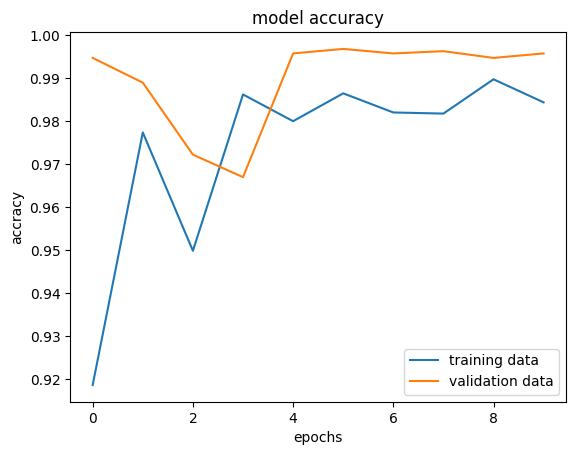

In [317]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accracy')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc = 'lower right')


Predictive System

In [320]:
input_data = (40,12,13.69212895,0,309.3134184,2089,52.23425789,12372,309.3134184,0,1099,4306,44,897,1189,101,758,140,427,437,79,116,79,0.038113265,0.055816388,0.038113265,5,6,30,1.25,0,0,0,0,4,2,6,0,0,0,0,0.1,0.05,0.15,138,395,222,26,27,118,0,123,88,0,8)
#changing the input_data to numpy array
input_data_as_numpy_array = np.asanyarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

scaled_input_data = scaler.transform(input_data_reshaped)

# Make predictions
prediction = model.predict(scaled_input_data)

# Assuming your model outputs probabilities for binary classification
predicted_class = 1 if prediction[0] > 0.5 else 0

if predicted_class == 0:
    print('This is a Benign System')
else:
    print('This is a Ransomware infected System.')

1/1 [==============================] - 0s 34ms/step
This is a Benign System


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
